In [1]:
import pandas as pd 
from pathlib import Path
data_folder = Path("data").resolve()

In [2]:
import pandas as pd

# Read the Excel file into a dictionary of dataframes
df_dict = pd.read_excel(data_folder / 'cc_Dataset.xlsx', sheet_name=['Sales 19-21', 'Sales 17-18', 'TV Spent', 'PromotionalEvents', 'OnsiteTrade'])

# Create a separate dataframe for each sheet_name in the dictionary
sales_19_21_df = df_dict['Sales 19-21']
sales_17_18_df = df_dict['Sales 17-18']
tv_spent_df = df_dict['TV Spent']
promo_events_df = df_dict['PromotionalEvents']
onsite_trade_df = df_dict['OnsiteTrade']


In [3]:
# Find out ranges of dates
print(f"Sales 17-18 min date: {sales_17_18_df['Date'].min()}")
print(f"Sales 17-18 max date: {sales_17_18_df['Date'].max()}")


print(f"Sales 19-21 min date: {sales_19_21_df['Date'].min()}")
print(f"Sales 19-21 max date: {sales_19_21_df['Date'].max()}")


print(f"TV SPENT min date: {tv_spent_df['Date'].min()}")
print(f"TV SPENT max date: {tv_spent_df['Date'].max()}")


print(f"Promotional Events min date: {promo_events_df['Date'].min()}")
print(f"Promotional Events max date: {promo_events_df['Date'].max()}")

print(f"Onsite Trade min date: {onsite_trade_df['Date'].min()}")
print(f"Onsite Trade max date: {onsite_trade_df['Date'].max()}")


Sales 17-18 min date: 2017-01-01 00:00:00
Sales 17-18 max date: 2018-12-01 00:00:00
Sales 19-21 min date: 2019-01-07 00:00:00
Sales 19-21 max date: 2021-07-12 00:00:00
TV SPENT min date: 2019-01-07 00:00:00
TV SPENT max date: 2021-07-12 00:00:00
Promotional Events min date: 2017-02-01 00:00:00
Promotional Events max date: 2021-12-01 00:00:00
Onsite Trade min date: 2017-01-01 00:00:00
Onsite Trade max date: 2020-12-01 00:00:00


In [4]:
# Concat sales into one dataframe
sales_frames = [sales_17_18_df, sales_19_21_df]
sales = pd.concat(sales_frames)

In [5]:
print(f"Sales data min date: {sales['Date'].min()}")
print(f"Sales data max date: {sales['Date'].max()}")

Sales data min date: 2017-01-01 00:00:00
Sales data max date: 2021-07-12 00:00:00


In [6]:
sales = sales.sort_values(by='Date')

In [7]:
sales.head()

,Date,Value
0,2017-01-01,83256.294414
1,2017-02-01,56386.698300
2,2017-03-01,43572.923602
3,2017-04-01,34325.450250
4,2017-05-01,32764.042520


In [8]:
sales.rename(columns={'Value': 'sales'}, inplace=True)

In [9]:
# Rename some column in tv promotional adds
tv_spent_df = tv_spent_df.rename(columns={'Channel 1': 'tv_channel_1', 
'Channel 2': 'tv_channel_2', 'Channel 3':'tv_channel_3'})

In [10]:
# Merge the TV spending data with the sales data
sales_tv_spent = pd.merge(sales, tv_spent_df, on='Date')

# Merge the promotional events data with the sales data
sales_promo_events = pd.merge(sales, promo_events_df, on='Date')

# Merge the trade marketing data with the sales data
sales_onsite_trade = pd.merge(sales, onsite_trade_df, on='Date')

In [11]:
# Work with tv promotional adds
sales_tv_spent.head()

,Date,sales,tv_channel_1,tv_channel_2,tv_channel_3
0,2019-01-07,2333.774722,605,125,37.381706
1,2019-01-14,2140.697120,508,167,34.766218
2,2019-01-21,2485.883420,0,166,46.756001
3,2019-01-28,2777.820794,0,191,47.218405
4,2019-02-04,2875.494071,0,158,44.303406


In [12]:
# Find out what is corralated with sales
corr_tv_spent = sales_tv_spent.corr()['sales'].loc['tv_channel_1':'tv_channel_3']
corr_tv_spent

tv_channel_1    0.225166
tv_channel_2    0.553599
tv_channel_3    0.805690
Name: sales, dtype: float64

In [13]:
import numpy as np 
# Calculate the total TV spending
tv_spending = sales_tv_spent['tv_channel_1'] + sales_tv_spent['tv_channel_2'] + sales_tv_spent['tv_channel_3']

# Calculate the ROI for each TV channel
sales_tv_spent['TV_Channel_1_ROI'] = (sales_tv_spent.sales * sales_tv_spent['tv_channel_1']) / np.where(tv_spending == 0, 1, tv_spending)
sales_tv_spent['TV_Channel_2_ROI'] = (sales_tv_spent.sales * sales_tv_spent['tv_channel_2']) / np.where(tv_spending == 0, 1, tv_spending)
sales_tv_spent['TV_Channel_3_ROI'] = (sales_tv_spent.sales * sales_tv_spent['tv_channel_3']) / np.where(tv_spending == 0, 1, tv_spending)

# Calculate the total ROI for all TV channel investments
sales_tv_spent['TV_ROI'] = sales_tv_spent.sales / np.where(tv_spending == 0, 1, tv_spending)



In [14]:
# Calculate overall tv spending
sales_tv_spent['tv_spending'] = sales_tv_spent['tv_channel_1'] + sales_tv_spent['tv_channel_2'] + sales_tv_spent['tv_channel_3']

In [15]:
sales_tv_spent.sort_values(by = 'Date', inplace= True)

<AxesSubplot:xlabel='Date', ylabel='TV_Channel_3_ROI'>

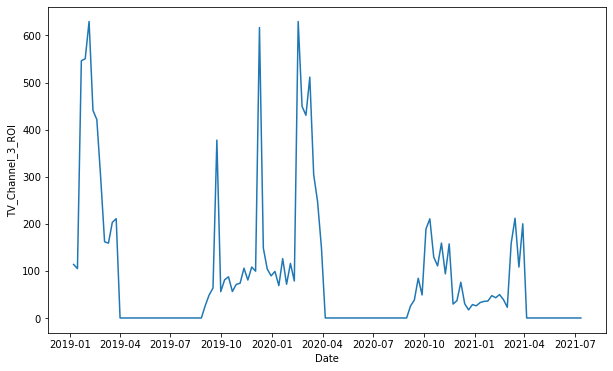

In [16]:
sales_tv_spent_date = sales_tv_spent.set_index('Date')

import matplotlib.pyplot as plt
import seaborn as sns

# Create a line plot of the ROI metrics over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=sales_tv_spent_date['TV_Channel_3_ROI'])

In [17]:
sales_tv_spent_date_month=  sales_tv_spent_date.resample('M').mean()

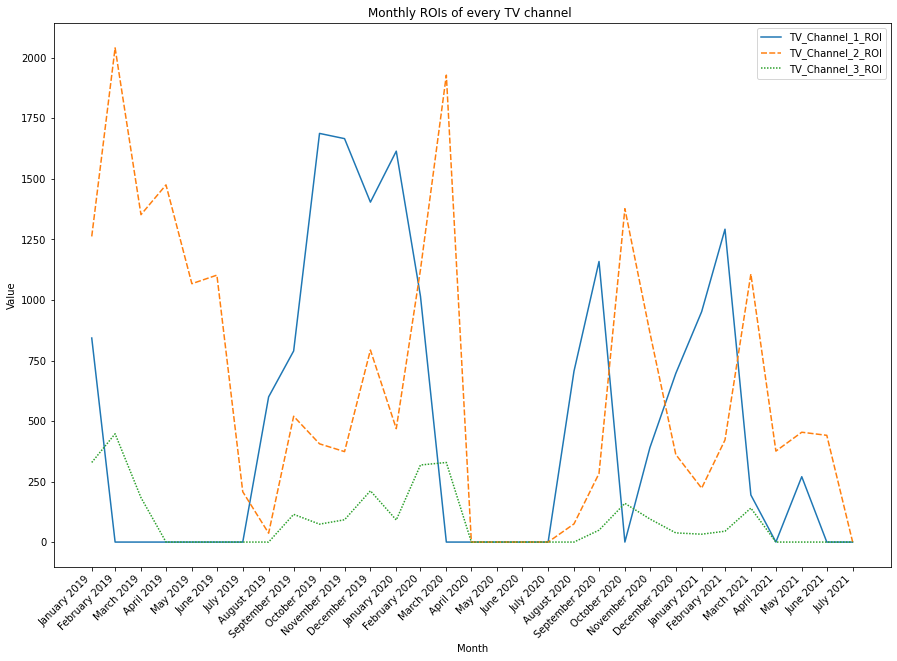

In [18]:
plt.figure(figsize=(15, 10))
sns.lineplot(data=sales_tv_spent_date_month[[ 'TV_Channel_1_ROI', 'TV_Channel_2_ROI', 'TV_Channel_3_ROI']])

# Set the tick labels for the x-axis
tick_labels = [d.strftime('%B %Y') for d in sales_tv_spent_date_month.index]
plt.xticks(sales_tv_spent_date_month.index, tick_labels, rotation=45, ha='right')
# Add labels and title to the plot
plt.xlabel('Month')
plt.ylabel('Value')
plt.title('Monthly ROIs of every TV channel ')

# Display the plot
plt.show()

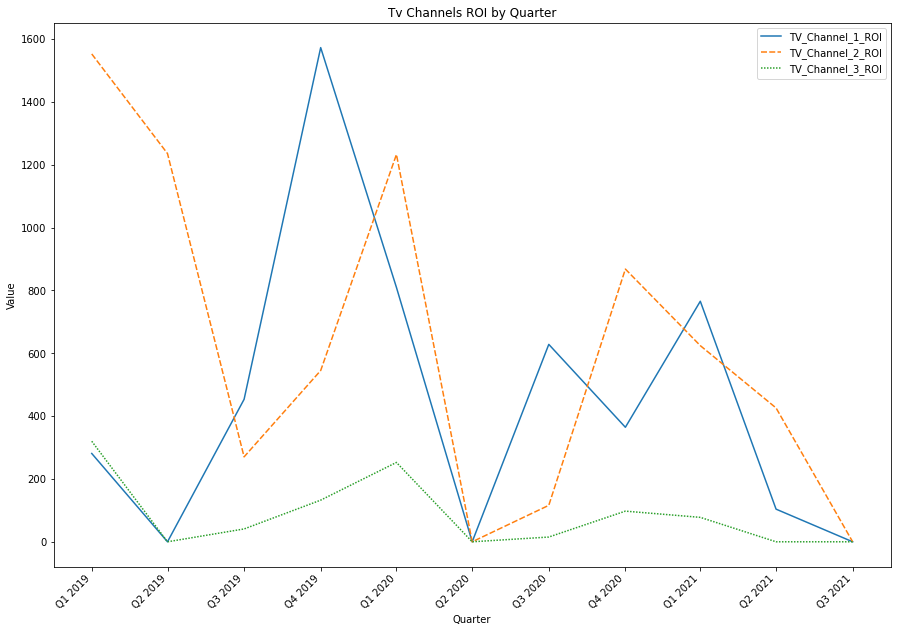

In [19]:
sales_tv_spent_date_q=  sales_tv_spent_date.resample('Q').mean()
plt.figure(figsize=(15, 10))
sns.lineplot(data=sales_tv_spent_date_q[['TV_Channel_1_ROI','TV_Channel_2_ROI', 'TV_Channel_3_ROI' ]])
tick_labels = [f'Q{q.quarter} {q.year}' for q in sales_tv_spent_date_q.index]
plt.xticks(sales_tv_spent_date_q.index, tick_labels,  rotation=45, ha='right')
# Add labels and title to the plot
plt.xlabel('Quarter')
plt.ylabel('Value')
plt.title('Tv Channels ROI by Quarter')

# Display the plot
plt.show()

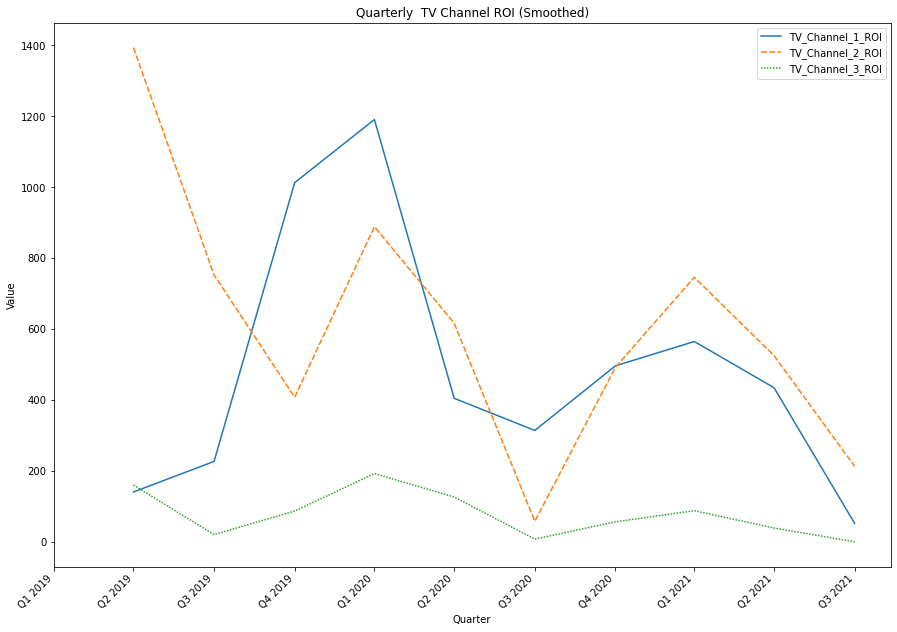

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns



# Smooth the lines by calculating a rolling average with window size 2 quarters
sales_tv_spent_date_q_smoothed = sales_tv_spent_date_q.rolling(window=2).mean()

# Create the line plot with smoothed data
plt.figure(figsize=(15, 10))
sns.lineplot(data=sales_tv_spent_date_q_smoothed[[ 'TV_Channel_1_ROI', 'TV_Channel_2_ROI', 'TV_Channel_3_ROI']])

# Set the tick labels for the x-axis
tick_labels = [f'Q{q.quarter} {q.year}' for q in sales_tv_spent_date_q_smoothed.index]
plt.xticks(sales_tv_spent_date_q_smoothed.index, tick_labels, rotation=45, ha='right')

# Add labels and title to the plot
plt.xlabel('Quarter')
plt.ylabel('Value')
plt.title('Quarterly  TV Channel ROI (Smoothed)')

# Display the plot
plt.show()


<AxesSubplot:>

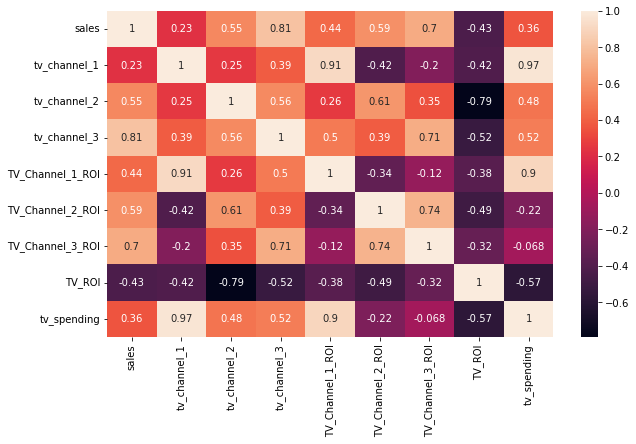

In [21]:
plt.figure(figsize=(10, 6))
sns.heatmap(sales_tv_spent.corr(), annot=True)

In [22]:
sales_tv_spent.corr()['sales'].loc['tv_channel_1':'TV_ROI'].sort_values()

TV_ROI             -0.429951
tv_channel_1        0.225166
TV_Channel_1_ROI    0.438465
tv_channel_2        0.553599
TV_Channel_2_ROI    0.589588
TV_Channel_3_ROI    0.702416
tv_channel_3        0.805690
Name: sales, dtype: float64

In [23]:
# sales promotional events 

sales_promo_events.head()

,Date,sales,Topic,Region,Target,Cost,Participants
0,2017-02-01,56386.69830,C&C,PARIS,GENERAL,24.881,523
1,2017-02-01,56386.69830,C&C,PARIS,PHYSICIANS,15.634,375
2,2017-02-01,56386.69830,COUGH,PARIS,PHYSICIANS,23.505,494
3,2017-05-01,32764.04252,C&C,PARIS,PHYSICIANS,11.039,298
4,2017-05-01,32764.04252,PULMONAR,PARIS,GENERAL,17.069,410


In [24]:
sales_promo_events.sort_values(by ='Cost')

,Date,sales,Topic,Region,Target,Cost,Participants
49,2018-09-01,52670.045106,COUGH,TOULOUSE,PHYSICIANS,10.475,31
59,2018-12-01,82616.154802,SOAR THROAT,PARIS,PHYSICIANS,10.996,99
3,2017-05-01,32764.042520,C&C,PARIS,PHYSICIANS,11.039,298
12,2018-01-01,84592.519326,COUGH,MARSEILLE,GENERAL,11.493,80
14,2018-01-01,84592.519326,COUGH,MARSEILLE,PHYSICIANS,11.842,71
...,...,...,...,...,...,...,...
11,2017-09-01,55884.359040,PULMONAR,OTHER,PHARMACIES,29.485,59
40,2018-06-01,26147.977383,C&C,PARIS,PHARMACIES,29.592,266
26,2018-02-01,77662.014620,C&C,MARSEILLE,PHARMACIES,29.827,89
65,2019-07-01,1038.626315,COUGH,OTHER,PHARMACIES,29.843,239


In [32]:
# Group the data by Topic and calculate the total sales and total promotional expenses
grouped = sales_promo_events.groupby(['Topic', 'Date']).agg({'sales': 'sum', 'Cost': 'sum'})
grouped['ROI'] = (grouped['sales'] - grouped['Cost']) / grouped['Cost']

grouped = grouped.reset_index()
grouped_promo_events = grouped.copy()

In [33]:
# check for missing values
grouped_promo_events.head()

,Topic,Date,sales,Cost,ROI
0,C&C,2017-02-01,112773.396600,40.515,2782.497386
1,C&C,2017-05-01,32764.042520,11.039,2967.026318
2,C&C,2017-09-01,111768.718080,36.360,3072.947142
3,C&C,2018-02-01,232986.043860,78.062,2983.628166
4,C&C,2018-03-01,53630.379705,20.441,2622.667125


In [34]:
grouped_promo_events.set_index('Date', inplace=True)

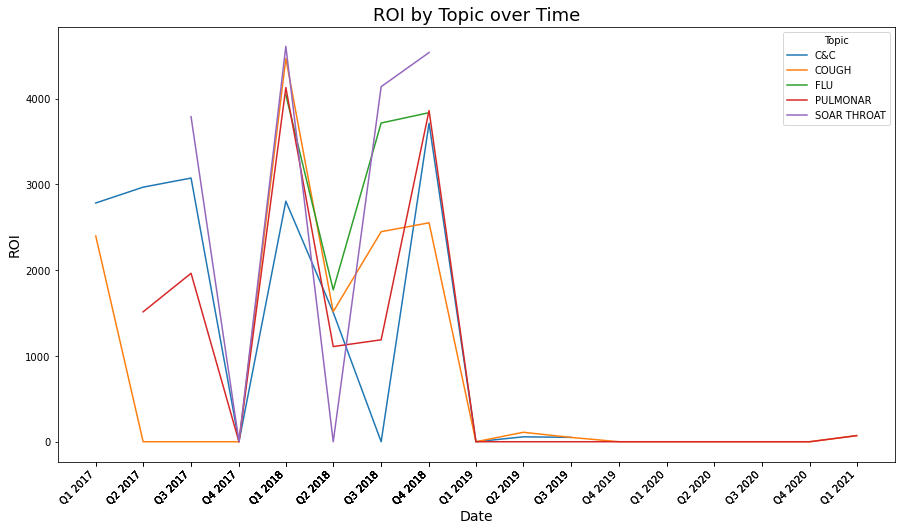

In [35]:

grouped_promo_events_m = grouped_promo_events.groupby('Topic').resample('Q').mean()


# Apply the rolling window to the ROI column

grouped_promo_events_m = grouped_promo_events_m.fillna(0)
# Reset the index of the DataFrame
grouped_promo_events_m.reset_index(inplace=True)

# Create a line plot for each topic with the ROI on the y-axis and the date on the x-axis
plt.figure(figsize=(15, 8))
g = sns.lineplot(x='Date', y='ROI', hue='Topic', data=grouped_promo_events_m)

# Set the tick labels for the x-axis
grouped_promo_events_m.set_index('Date', inplace=True)
tick_labels = [f'Q{q.quarter} {q.year}' for q in grouped_promo_events_m.index]
plt.xticks(grouped_promo_events_m.index, tick_labels, rotation=45, ha='right')
# Set the x-axis label
g.set_xlabel('Date', fontsize=14)

# Set the y-axis label
g.set_ylabel('ROI', fontsize=14)

# Set the title of the plot
g.set_title('ROI by Topic over Time', fontsize=18)

# Show the plot
plt.show()

In [30]:
grouped_promo_events_m

,Topic,sales,Cost,ROI
Date,,,,
2017-03-31,C&C,112773.396600,40.515000,2782.497386
2017-06-30,C&C,32764.042520,11.039000,2967.026318
2017-09-30,C&C,111768.718080,36.360000,3072.947142
2017-12-31,C&C,0.000000,0.000000,0.000000
2018-03-31,C&C,143308.211782,49.251500,2803.147645
2018-06-30,C&C,54581.005305,44.206500,1506.886962
2018-09-30,C&C,0.000000,0.000000,0.000000
2018-12-31,C&C,73438.949381,19.781000,3711.600444
2019-03-31,C&C,0.000000,0.000000,0.000000


In [71]:
# Group the data by Topic and calculate the total sales and total promotional expenses
grouped = sales_promo_events.groupby(['Region', 'Date']).agg({'sales': 'sum', 'Cost': 'sum'})
grouped['ROI'] = (grouped['sales'] - grouped['Cost']) / grouped['Cost']

grouped = grouped.reset_index()
grouped_promo_events_region = grouped.copy()

In [72]:
grouped_promo_events_region.set_index('Date', inplace=True)

In [79]:
grouped_promo_events_region

,Region,sales,Cost,ROI
Date,,,,
2018-11-01,LYON,220316.848142,67.574,3259.378964
2018-01-01,MARSEILLE,253777.557978,43.764,5797.774289
2018-02-01,MARSEILLE,232986.043860,64.578,3606.823777
2019-04-01,MARSEILLE,5022.980761,58.815,84.403056
2021-02-01,MARSEILLE,4818.888085,66.087,71.917338
2017-09-01,OTHER,167653.077120,85.354,1963.208791
2018-04-01,OTHER,184308.470766,108.416,1699.011721
2018-05-01,OTHER,79606.033639,71.693,1109.373867
2019-07-01,OTHER,6231.757889,121.703,50.204637


/var/folders/qd/2qwtnqg57r915dp6p3dq762c0000gn/T/ipykernel_30369/832016013.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_promo_events_m = grouped_promo_events_region.groupby('Region').resample('Q').mean()
/var/folders/qd/2qwtnqg57r915dp6p3dq762c0000gn/T/ipykernel_30369/832016013.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_promo_events_m = grouped_promo_events_region.groupby('Region').resample('Q').mean()
/var/folders/qd/2qwtnqg57r915dp6p3dq762c0000gn/T/ipykernel_30369/832016013.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a f

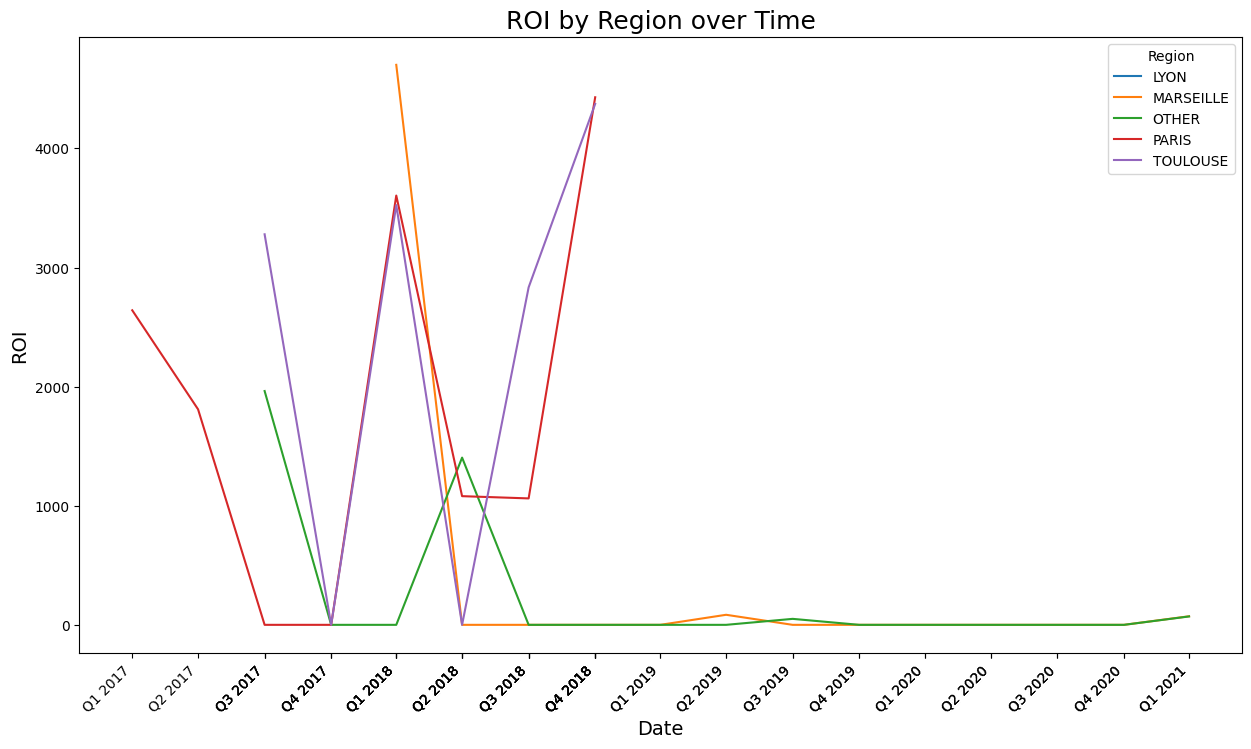

In [73]:

grouped_promo_events_m = grouped_promo_events_region.groupby('Region').resample('Q').mean()


# Apply the rolling window to the ROI column

grouped_promo_events_m = grouped_promo_events_m.fillna(0)
# Reset the index of the DataFrame
grouped_promo_events_m.reset_index(inplace=True)

# Create a line plot for each topic with the ROI on the y-axis and the date on the x-axis
plt.figure(figsize=(15, 8))
g = sns.lineplot(x='Date', y='ROI', hue='Region', data=grouped_promo_events_m)

# Set the tick labels for the x-axis
grouped_promo_events_m.set_index('Date', inplace=True)
tick_labels = [f'Q{q.quarter} {q.year}' for q in grouped_promo_events_m.index]
plt.xticks(grouped_promo_events_m.index, tick_labels, rotation=45, ha='right')
# Set the x-axis label
g.set_xlabel('Date', fontsize=14)

# Set the y-axis label
g.set_ylabel('ROI', fontsize=14)

# Set the title of the plot
g.set_title('ROI by Region over Time', fontsize=18)

# Show the plot
plt.show()

In [37]:
sales_onsite_trade = sales_onsite_trade.rename(columns={'Value':'Cost'})

In [38]:
# Group the data by Topic and calculate the total sales and total promotional expenses
grouped_onsite_trade = sales_onsite_trade.groupby(['Region', 'Date']).agg({'sales': 'sum', 'Cost': 'sum'})

# Drop the rows where 'Cost' is 0
grouped_onsite_trade = grouped_onsite_trade[grouped_onsite_trade['Cost'] != 0]

# Calculate the ROI
grouped_onsite_trade['ROI'] = (grouped_onsite_trade['sales'] - grouped_onsite_trade['Cost']) / grouped_onsite_trade['Cost']


In [40]:
grouped_onsite_trade.head(1)

,,sales,Cost,ROI
Region,Date,,,
ATLANTIQUE,2017-01-01,166512.588828,1583.4,104.161418


In [39]:
grouped_onsite_trade.set_index('Date', inplace=True)

KeyError: "None of ['Date'] are in the columns"

In [36]:
print(grouped_onsite_trade.head())

NameError: name 'grouped_onsite_trade' is not defined

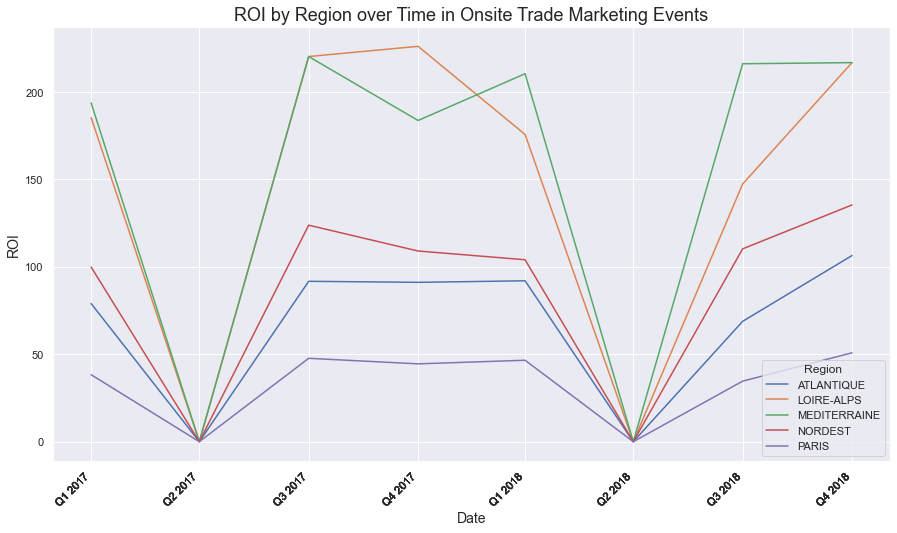

In [87]:



grouped_onsite_trade_q = grouped_onsite_trade.groupby('Region').resample('Q').mean()



grouped_onsite_trade_q = grouped_onsite_trade_q.fillna(0)
# Reset the index of the DataFrame
grouped_onsite_trade_q.reset_index(inplace=True)

# Create a line plot for each topic with the ROI on the y-axis and the date on the x-axis
plt.figure(figsize=(15, 8))
g = sns.lineplot(x='Date', y='ROI', hue='Region', data=grouped_onsite_trade_q)

# Set the tick labels for the x-axis
grouped_onsite_trade_q.set_index('Date', inplace=True)
tick_labels = [f'Q{q.quarter} {q.year}' for q in grouped_onsite_trade_q.index]
plt.xticks(grouped_onsite_trade_q.index, tick_labels, rotation=45, ha='right')
# Set the x-axis label
g.set_xlabel('Date', fontsize=14)

# Set the y-axis label
g.set_ylabel('ROI', fontsize=14)

# Set the title of the plot
g.set_title('ROI by Region over Time in Onsite Trade Marketing Events', fontsize=18)

# Show the plot
plt.show()




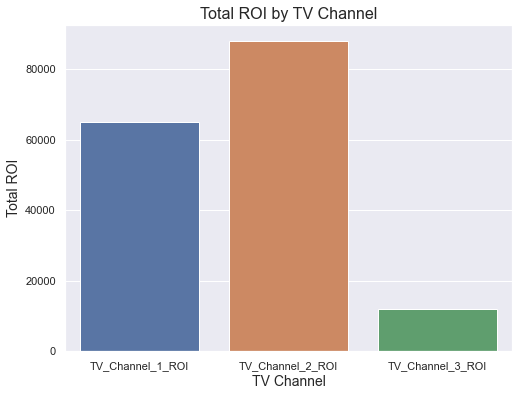

In [107]:
# Calculate total ROI for each TV channel
total_tv_roi = sales_tv_spent[['TV_Channel_1_ROI', 'TV_Channel_2_ROI','TV_Channel_3_ROI' ]].sum()

# Create a bar plot to compare ROI for each channel
plt.figure(figsize=(8,6))
sns.barplot(x=total_tv_roi.index, y=total_tv_roi.values)
plt.title('Total ROI by TV Channel', fontsize=16)
plt.xlabel('TV Channel', fontsize=14)
plt.ylabel('Total ROI', fontsize=14)
plt.show()


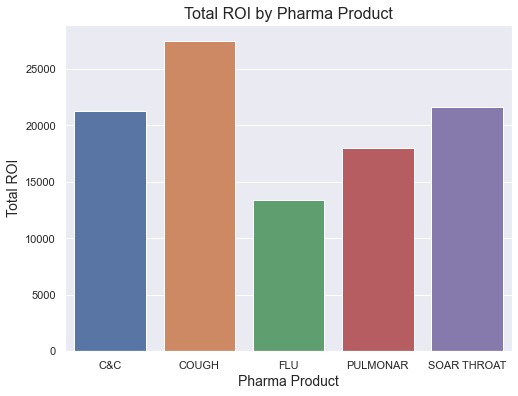

In [110]:
# Calculate total ROI for each pharma product
total_product_roi = grouped_promo_events.groupby('Topic')['ROI'].sum()

# Create a bar plot to compare ROI for each product
plt.figure(figsize=(8,6))
sns.barplot(x=total_product_roi.index, y=total_product_roi.values)
plt.title('Total ROI by Pharma Product', fontsize=16)
plt.xlabel('Pharma Product', fontsize=14)
plt.ylabel('Total ROI', fontsize=14)
plt.show()


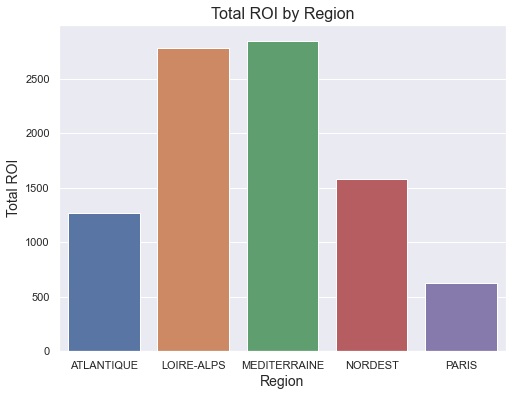

In [111]:
# Calculate total ROI for each region
total_region_roi = grouped_onsite_trade.groupby('Region')['ROI'].sum()

# Create a bar plot to compare ROI for each region
plt.figure(figsize=(8,6))
sns.barplot(x=total_region_roi.index, y=total_region_roi.values)
plt.title('Total ROI by Region', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Total ROI', fontsize=14)
plt.show()


12:46:39 - cmdstanpy - INFO - Chain [1] start processing
12:46:39 - cmdstanpy - INFO - Chain [1] done processing


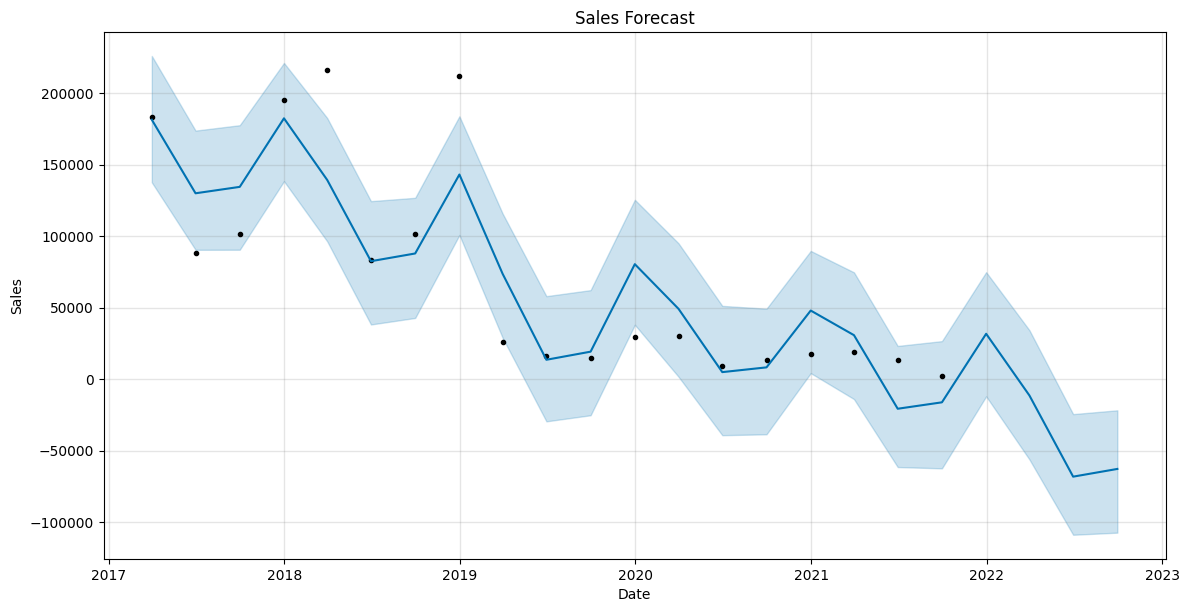

In [44]:
# Forecast sales


import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Rename columns to ds and y for Prophet
sales_forecast = sales.rename(columns={'Date': 'ds', 'Value': 'y'})

# Set the frequency to quarterly
sales_forecast = sales_forecast.set_index('ds').resample('Q').sum().reset_index()

# Create a Prophet model
m = Prophet()
# Add quarterly seasonality
m.add_seasonality(name='quarterly', period=365.25/4, fourier_order=5)

# Fit the model on the sales data
m.fit(sales_forecast)

# Create a future dataframe with quarterly frequency for the next 4 quarters
future = m.make_future_dataframe(periods=4, freq='Q')

# Predict the sales for the future dataframe
forecast = m.predict(future)


# Plot the forecasted sales with upper and lower bounds
fig, ax = plt.subplots(figsize=(12, 6))
fig = m.plot(forecast, ax=ax)


# Set the x-axis label
plt.xlabel('Date')

# Set the y-axis label
plt.ylabel('Sales')

# Set the title of the plot
plt.title('Sales Forecast')

# Show the plot
plt.show()
